In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [45]:
import os
import runner

In [50]:
qfib_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
qfib_ext = '.tck'
tko_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [6,7,8,9,10,11,12,13,14]


In [47]:
qfib_sizes = [0]*len(qfib_bits)
qfib_errors = [0]*len(qfib_bits)
qfib_stds = [0]*len(qfib_bits)
for f in qfib_files:
    for i,b in enumerate(qfib_bits):
        rundata = runner.Runner.qfib(f[0], f[1], bits=b, force=False)
        c_time = rundata[0]
        d_time = rundata[1]
        sizestats = rundata[2]
        compressedsize = sizestats[1]
        meanerror = rundata[3][2]
        stderror = rundata[3][3]
        
        if meanerror > 2:
            continue
        qfib_sizes[i] += compressedsize
        qfib_errors[i] += meanerror
        qfib_stds[i] += stderror
#         qfib_sizes.append(compressedsize)
#         qfib_errors.append(meanerror)
#         qfib_stds.append(stderror)
for i,b in enumerate(qfib_bits):
    qfib_sizes[i] /= len(qfib_files)
    qfib_errors[i] /= len(qfib_files)
    qfib_stds[i] /= len(qfib_files)

In [51]:
tko_sizes = [0]*len(tko_bits)
tko_errors = [0]*len(tko_bits)
tko_stds = [0]*len(tko_bits)
fails = [len(tko_files)]*len(tko_bits)
for j,f in enumerate(tko_files):
    for i,b in enumerate(tko_bits):

        config = {
            'POSITION': {
                'position':True,
                'sequential':True,
                'quantization_bits':b,
                'compression_level':10,
                'quantization_range':-1,
                'quantization_origin':None
            },
            'INDICES': {
                'position':False,
                'sequential':True,
                'quantization_bits':b,
                'compression_level':10,
                'quantization_range':-1,
                'quantization_origin':None
            },
            'name': 'qbi'+str(b)
        }
        
        try:
            rundata = runner.Runner.tko(f[0], f[1], config=config, coords_only=True, force=False)
        except:
            fails[i] -= 1
            continue
        c_time = rundata[0]
        d_time = rundata[1]
        sizestats = rundata[2]
        compressedsize = sizestats[1]
        meanerror = rundata[3][2]
        stderror = rundata[3][3]
        tko_sizes[i] += compressedsize
        tko_errors[i] += meanerror
        tko_stds[i] += stderror
#         tko_sizes.append(compressedsize)
#         tko_errors.append(meanerror)
#         tko_stds.append(stderror)
for i,b in enumerate(tko_bits):
    tko_sizes[i] /= fails[i]#len(tko_files)
    tko_errors[i] /= fails[i]#len(tko_files)
    tko_stds[i] /= fails[i]#len(tko_files)

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

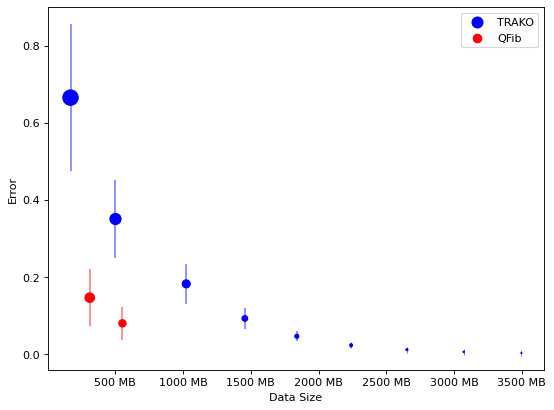

In [131]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

tko_sizes_ = np.array(tko_sizes) / 1000
qfib_sizes_ = np.array(qfib_sizes) / 1000

plt.scatter(tko_sizes_, tko_errors, s = np.array(tko_stds)*1000, color='blue', alpha=1, label='TRAKO')
plt.errorbar(tko_sizes_, tko_errors, tko_stds, fmt='|', color='blue', alpha=.5)

plt.scatter(qfib_sizes_, qfib_errors, s = np.array(qfib_stds)*1000, color='red', alpha=1, label='QFib')
plt.errorbar(qfib_sizes_, qfib_errors, qfib_stds, fmt='|', color='red', alpha=.5)
plt.ticklabel_format(style='plain', axis='both', scilimits=(0, 0))
import matplotlib.ticker as mticker    
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d MB'))

plt.xlabel('Data Size')
plt.ylabel('Error')
plt.legend()
plt.show()